In [ ]:
# # Mengimpor pustaka yang diperlukan
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os #Untuk operasi sistem
import sys # Untuk parameter dan fungsi sistem
from tempfile import NamedTemporaryFile # Untuk membuat file sementara
from urllib.request import urlopen # Untuk membuka URL
from urllib.parse import unquote, urlparse # Untuk menguraikan URL
from urllib.error import HTTPError # Untuk menangani error HTTP
from zipfile import ZipFile # Untuk mengekstrak file ZIP
import tarfile # Untuk mengekstrak file TAR
import shutil # Untuk operasi file tingkat tinggi seperti menyalin dan menghapus

# Mengatur ukuran chunk untuk pengunduhan file
CHUNK_SIZE = 40960 # Ukuran chunk diatur sebesar 40 KB
# Pemetaan sumber data yang akan digunakan dalam notebook
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F8191%2F11478%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240613%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240613T202414Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2a7edacc3069fe451da7b22af76305ea4a6961b84f25b8d6385693119c5220ac3757fdb8263aa864f47fc99b6a6afe6c15fb63c6c77d9b6316da4c9e2bc17f6292dac0cd3f8680864e9a73a85e99c6ad54d8bf1e8f90c18b66cf940817ae42c64e93e5fb6f8339d31eba655fc93ab0006ea6af0fcd552d7e4160b2d275df4ca16dec696a1a14554790889470853a69631d9312ee0a60f3ba03fc4d9c22a24cfbf80248c6c2ac653fef9c2c2aa5a0b71936d7904aa00cfbe29486c48fc4d78e2986640a7167a25c8164150e692b2aaa03382b8c3df3c11806781193054ab700c442510ecb5bce149b42fcc849cedd3d78ec4e6fd2cfbfc86265a5601f514b11e3'

KAGGLE_INPUT_PATH='/kaggle/input' # Jalur untuk penyimpanan input data di Kaggle
KAGGLE_WORKING_PATH='/kaggle/working' # Jalur untuk penyimpanan file kerja di Kaggle
KAGGLE_SYMLINK='kaggle' # Nama untuk symlink

# Memastikan bahwa direktori input dapat diakses dengan benar
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# Membuat symlink untuk direktori input dan working jika belum ada
try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

# Mengunduh dan Mengekstrak Dataset
# Loop melalui setiap pasangan direktori dan URL dalam DATA_SOURCE_MAPPING
for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
      # Mengunduh data dari URL
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)

            # Loop untuk mengunduh file dalam chunk
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)

            # Mengekstrak file zip atau tar
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}') # Menangani kesalahan HTTP
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}') # Menangani kesalahan OS lainnya
        continue

print('Data source import complete.') # Menandakan bahwa semua data telah berhasil diunduh dan diekstrak


[==================================================] 2404771 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


# Introduction

## Reference:

https://www.kaggle.com/nidhirastogi/intrusion-detection/data

## Import libraries

In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data
import matplotlib.pyplot as plt # Mengimpor pustaka matplotlib.pyplot untuk visualisasi data
import matplotlib as matplot # Mengimpor matplotlib secara keseluruhan untuk pengaturan tambahan jika diperlukan
import numpy as np # Mengimpor pustaka numpy untuk operasi numerik

import re # Mengimpor pustaka re untuk operasi regex (regular expression)
import sklearn # Mengimpor pustaka sklearn untuk machine learning

# Mengimpor pustaka warnings dan mengabaikan semua peringatan
import warnings
import warnings
warnings.filterwarnings("ignore")

# Mengatur inline plotting untuk notebook, sehingga grafik tampil langsung di dalam notebook
%matplotlib inline

# Membaca Data dari CSV
# Membaca dataset pelatihan dari file CSV yang berada di direktori ../input/
df_train = pd.read_csv('../input/Train_data.csv')

# Membaca dataset pengujian dari file CSV yang berada di direktori ../input/
df_test = pd.read_csv('../input/test_data.csv')

# Menghapus kolom 'Unnamed: 0' dari dataset pengujian karena dianggap tidak perlu
df_test = df_test.drop('Unnamed: 0',axis=1)

## Exploring the data

Data has 42 columns: duration, protocol_type, src_bytes, wrong_fragment, etc.

Training set has 125973 and Test set has 10000 samples

In [ ]:
df_train.head()  # Menampilkan beberapa baris pertama dari dataset pelatihan

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df_test.head() # Menampilkan lima baris pertama dari DataFrame df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


## Save training dataset and test dateaset to each df and split X and Y (xAttack, analysis features).

Using the 41 attributes from both training and testing dataset to classify whether it is an attack(DOS/R2L/Probe/U2R/Normal)[5 labels]

In [ ]:
# Memisahkan fitur (X) dan label target (Y) dari dataset pelatihan (df_train)
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
# Memisahkan fitur (X) dan label target (Y) dari dataset pengujian (df_test)
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [ ]:
# Menampilkan semua nilai unik dari kolom 'xAttack' dalam dataset pelatihan untuk memeriksa kelas yang ada
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


## Preprocessing and one hot encoding, X is onehotencoder, Y is LabelBinarizer

In [ ]:
# Mengimpor pustaka preprocessing dan OneHotEncoder dari scikit-learn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Inisialisasi LabelEncoder, OneHotEncoder, dan LabelBinarizer
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

### X OneHotEncoding

In [ ]:
# Mengonversi kolom 'protocol_type' dalam X_train menggunakan LabelEncoder
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

# Mengonversi kolom 'protocol_type' dalam X_test menggunakan LabelEncoder
X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

# Menampilkan lima baris pertama dari DataFrame X_train untuk memeriksa hasil transformasi
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Y LabelBinarizer

In [ ]:
# Mengonversi kolom 'xAttack' dalam Y_train menggunakan LabelEncoder
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
# Mengonversi kolom 'xAttack' dalam Y_train menggunakan LabelBinarizer
lb.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

# Mengonversi kolom 'xAttack' dalam Y_test menggunakan LabelEncoder
Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])

# Mengonversi kolom 'xAttack' dalam Y_test menggunakan LabelBinarizer
lb.fit_transform(Y_test['xAttack'])

# Mengonversi kolom 'xAttack' dalam Y_test menggunakan LabelBinarizer
Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


### 1. Deviasi Standar
We have applied a method to exclude features with small standard deviation (small deviation). However, when the feature type is discrete, the deviation is small.

In [ ]:
# Daftar fitur yang dikecualikan karena tipe data yang diskrit
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
# Note: Daftar ini mencakup fitur-fitur yang memiliki tipe data diskrit dan tidak akan dihapus berdasarkan deviasi standar.

# Menghapus fitur diskrit dari X_train untuk analisis deviasi standar
con_train = X_train.drop(con_list, axis=1)

# Menghitung deviasi standar dari setiap fitur dalam con_train
stdtrain = con_train.std(axis=0)

# Mengonversi hasil deviasi standar menjadi DataFrame
std_X_train = stdtrain.to_frame()

# Menampilkan 10 fitur dengan deviasi standar terkecil
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


num_outbound_cmds is removed from the first because the standard deviation is zero.

In [ ]:
# Menghapus kolom 'num_outbound_cmds' dari X_train
X_train = X_train.drop(['num_outbound_cmds'], axis=1)

# Menghapus kolom 'num_outbound_cmds' dari X_test
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

# Menggabungkan kembali X_train dan Y_train menjadi satu DataFrame df_train
df_train = pd.concat([X_train, Y_train], axis=1)

# Menampilkan lima baris pertama dari DataFrame df_train untuk memeriksa hasil penggabungan
df_train.head()

# Menampilkan lima baris pertama dari DataFrame X_train untuk memeriksa hasil penghapusan kolom
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Std picks the 10 low and stores the features in drop -> X_train_stdrop. (Will be used after ensemble feature selection)

In [ ]:
# Daftar fitur dengan deviasi standar rendah yang akan dihapus dari dataset
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

# Menghapus fitur dalam stdrop_list dari X_test
X_test_stdrop = X_test.drop(stdrop_list, axis=1)

# Menghapus fitur dalam stdrop_list dari X_train
X_train_stdrop = X_train.drop(stdrop_list, axis=1)

# Menggabungkan kembali X_train_stdrop dan Y_train menjadi satu DataFrame df_train_stdrop
df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

# Menampilkan lima baris pertama dari DataFrame df_train_stdrop untuk memeriksa hasil penggabungan
df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


Baseline - Pelajari tentang kinerja dengan regresi linier

- Linear regression

In [ ]:
from sklearn import linear_model #mengimpor modul linear_model dari library scikit-learn yang berisi implementasi algoritma Linear Regression.

In [ ]:
LR = linear_model.LinearRegression() #Baris ini membuat instance dari kelas LinearRegression yang merupakan implementasi algoritma Linear Regression dalam scikit-learn.

In [ ]:
LR.fit(X_train, Y_train) # untuk Melatih model Linear Regression dengan data training.

LinearRegression()

In [ ]:
lr_score = LR.score(X_test, Y_test) #Menghitung skor koefisien determinasi (R^2) model pada data testing.
print('Linear regression processing ,,,') # Mencetak string "Linear regression processing ,,,".
print('Linear regression Score: %.2f %%' % lr_score) # Mencetak skor koefisien determinasi dalam bentuk persentase dengan dua angka di belakang koma.

Linear regression processing ,,,
Linear regression Score: 0.33 %


The linear regression yields only 33% probability.

### 2. Ensemble feature selection
Ensemble Modeling can see how the feature affected each model. Therefore, we tried feature selection around those features (attempt to remove Irrelevant feature).

In [ ]:
# Mengimpor beberapa algoritma ensemble dan decision tree dari library scikit-learn.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Membuat instance dari beberapa algoritma ensemble dengan parameter tertentu, seperti AdaBoost, Random Forest, Extra Trees, dan Gradient Boosting.
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [ ]:
y_train = Y_train['xAttack'].ravel() # Mengekstrak nilai dari kolom 'xAttack' dari data Y_train dan meratakan menjadi array 1D.

# Mengonversi data X_train dan X_test menjadi array NumPy.
x_train = X_train.values
x_test = X_test.values

Check the feature importances to see how accurate the basic features are.

In [ ]:
# Baris kode ini melatih model AdaBoost dengan data training X_train (variabel independen) dan Y_train (variabel dependen). Metode fit akan melatih model AdaBoost dengan menggunakan algoritma boosting pada sekumpulan decision tree.
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
# Baris ini untuk mendapatkan importance score untuk setiap fitur dari model AdaBoost yang telah dilatih.
AB_feature = AB.feature_importances_
AB_feature

# Menghitung skor akurasi model AdaBoost pada data testing.
ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,') # Mencetak string "AdaBoostClassifier processing ,,,".
print('AdaBoostClassifier Score: %.3f %%' % ab_score) # Mencetak skor akurasi model AdaBoost dalam bentuk persentase dengan tiga angka di belakang koma.

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.751 %


In [ ]:
RF.fit(X_train, Y_train) # Melatih model Random Forest dengan data training.

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
# Mendapatkan importance score untuk setiap fitur dari model Random Forest yang telah dilatih.
RF_feature = RF.feature_importances_
RF_feature

# Menghitung skor akurasi model Random Forest pada data testing.
rf_score = RF.score(X_test, Y_test)

# Mencetak string "RandomForestClassifier processing ,,,", dan skor akurasi model Random Forest dalam bentuk persentase dengan tiga angka di belakang koma.
print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.737 %


In [ ]:
# Melatih model Extra Trees dengan data training.
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [ ]:
# Mendapatkan importance score untuk setiap fitur dari model Extra Trees yang telah dilatih.
ET_feature = ET.feature_importances_
ET_feature

# Menghitung skor akurasi model Extra Trees pada data testing.
et_score = ET.score(X_test, Y_test)

# Mencetak string "ExtraTreesClassifier processing ,,,", dan skor akurasi model Extra Trees dalam bentuk persentase dengan tiga angka di belakang koma.
print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.759 %


In [ ]:
GB.fit(X_train, Y_train) # Melatih model Gradient Boosting dengan data training.

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [ ]:
# Mendapatkan importance score untuk setiap fitur dari model Gradient Boosting yang telah dilatih.
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test) # Menghitung skor akurasi model Gradient Boosting pada data testing.

print('GradientBoostingClassifier processing ,,,') # Mencetak string "GradientBoostingClassifier processing ,,,".
print('GradientBoostingClassifier Score: %.3f %%' % gb_score) # Mencetak skor akurasi model Gradient Boosting dalam bentuk persentase dengan tiga angka di belakang koma.

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


Let's look at how the features affect each other through Ensemble

In [ ]:
cols = X_train.columns.values # Mendapatkan daftar nama kolom (fitur) dari data X_train.

# Membuat DataFrame baru dengan kolom 'features' yang berisi daftar nama fitur, dan kolom-kolom lain yang berisi importance score masing-masing fitur untuk setiap algoritma ensemble.
feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8) # Menampilkan 8 baris pertama dari DataFrame feature_df.

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000100,0.002710,0.001760,0.001524
1,protocol_type,0.460425,0.035279,0.029345,0.011440
2,service,0.520245,0.018394,0.016190,0.007808
3,flag,0.000039,0.049330,0.066090,0.001157
4,src_bytes,0.006713,0.093693,0.018615,0.361460
5,dst_bytes,0.001417,0.104538,0.006011,0.062387
6,land,0.000005,0.000009,0.000021,0.000036
7,wrong_fragment,0.000098,0.003737,0.015395,0.013347


Graphs showing the influence of features

[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

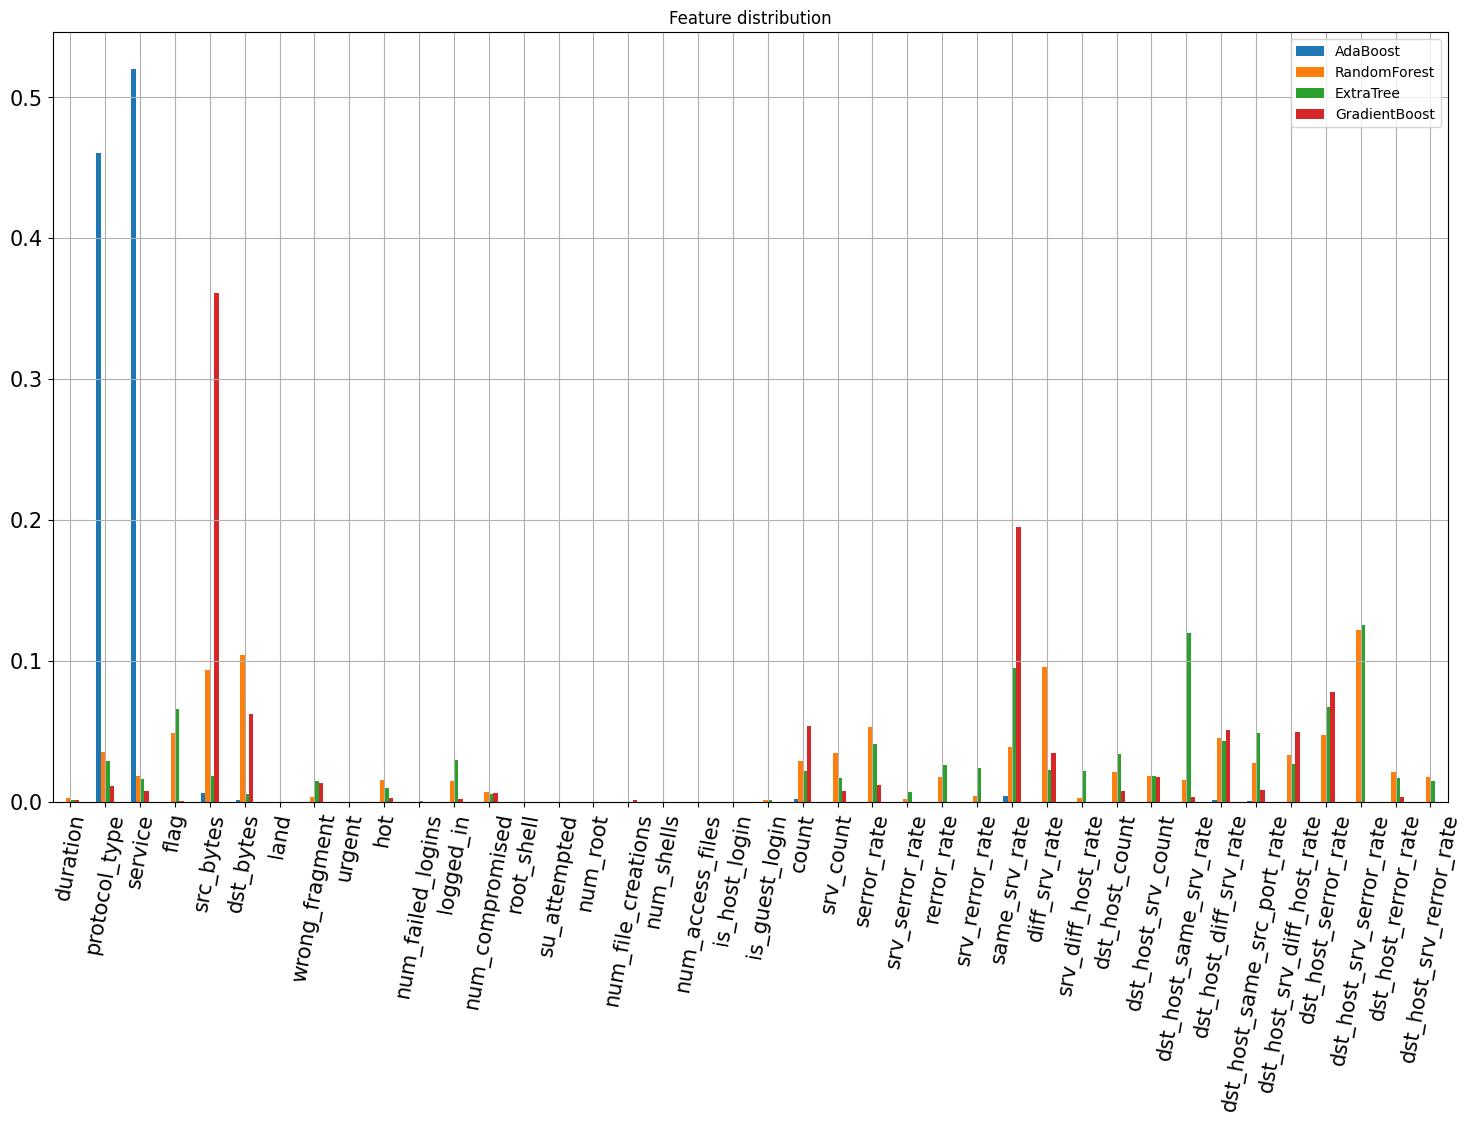

In [ ]:
# Mengimpor kelas MaxNLocator dari modul matplotlib.ticker dan namedtuple dari modul collections.
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

# Membuat plot batang dari DataFrame feature_df dengan ukuran gambar 18x10 inci, judul 'Feature distribution', menampilkan grid, legenda, ukuran font 15, dan menggunakan indeks DataFrame sebagai tick label pada sumbu x.
graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)

# Mengatur label pada sumbu x dengan menggunakan daftar nama fitur dari DataFrame feature_df dan memutar label sebesar 80 derajat agar mudah dibaca.
graph.set_xticklabels(feature_df.features, rotation = 80)

#### Extract twelve features from each Ensemble model

In [ ]:
# Mengambil fitur penting dari setiap model
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

#### Delete Duplicates

In [ ]:
# Menggabungkan fitur penting dan menghapus duplikat
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates()

# Menampilkan hasil akhir
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.520245,0.018394,0.016190,0.007808
1,protocol_type,0.460425,0.035279,0.029345,0.011440
4,src_bytes,0.006713,0.093693,0.018615,0.361460
27,same_srv_rate,0.004401,0.039236,0.095088,0.194917
21,count,0.002365,0.029359,0.021810,0.054407
33,dst_host_diff_srv_rate,0.001810,0.045449,0.043621,0.050975
5,dst_bytes,0.001417,0.104538,0.006011,0.062387
34,dst_host_same_src_port_rate,0.000784,0.027486,0.049304,0.008553
36,dst_host_serror_rate,0.000343,0.047576,0.067770,0.078090
31,dst_host_srv_count,0.000320,0.018883,0.018899,0.017996


In [ ]:
selected_features = result['features'].values.tolist() # Mengambil fitur terpilih dari DataFrame result
selected_features # Menampilkan daftar fitur terpilih

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'dst_host_srv_serror_rate',
 'flag',
 'serror_rate',
 'dst_host_count',
 'logged_in',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'wrong_fragment',
 'srv_count']

#### Below are the results of training with the exception of the features with small standard deviations.

In [ ]:
AB.fit(X_train_stdrop, Y_train) # Melatih model AdaBoost dengan fitur terpilih

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
# Menghitung skor akurasi model AdaBoost dengan fitur terpilih pada data testing
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.737 %


In [ ]:
RF.fit(X_train_stdrop, Y_train) # Melatih model Random Forest dengan fitur terpilih

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
# # Menghitung skor akurasi Random Forest dengan fitur terpilih pada data testing
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.750 %


In [ ]:
# Melatih model Extra Trees dengan fitur terpilih
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [ ]:
# Menghitung skor akurasi Extra Trees dengan fitur terpilih pada data testing
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.742 %


In [ ]:
# Melatih model Gradient Boosting dengan fitur terpilih
GB.fit(X_train_stdrop, Y_train)

In [ ]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

#### Only features obtained through ensemble

In [ ]:
# Membuat subset data training hanya dengan fitur terpilih
X_train_ens = X_train[selected_features]
X_train_ens.head()

# Membuat subset data testing hanya dengan fitur terpilih
X_test_ens = X_test[selected_features]
X_test_ens.head()

### 3. Correlation
Features that have high correlation among multiple features (redundant features)
are merged or deleted. This is because if there is a large correlation between these features,
there is no need to increase the number of features.

In [ ]:
#Mengambil subset 10000 baris pertama dari X_train_ens
sample = X_train_ens[:10000]

colormap = plt.cm.viridis

# Membuat plot heatmap korelasi fitur pada subset data
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

#### The above graph analysis shows that the dependency is high in the following features

In [ ]:
# Mendefinisikan fitur yang akan dihapus karena berkorelasi tinggi
selected2 = ['dst_host_serror_rate', 'serror_rate']

# Menghapus fitur berkorelasi tinggi dari subset data training
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

# Menghapus fitur berkorelasi tinggi dari subset data testing
X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

## 2) Modeling

#### Modeling after completion of the feature selection process (elimination of low deviation, high correlation)
#### Comparing final modeling results with features that affect ensemble modeling

### Ensemble Modeling results with final modeling impact

In [ ]:
# Melatih model AdaBoost dengan data training X_train_cordrop dan target Y_train.
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
# Menghitung skor akurasi model AdaBoost pada data testing X_test_cordrop dan Y_test.
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,') # Mencetak string "AdaBoostClassifier_final processing ,,,".
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore) # Mencetak skor akurasi model AdaBoost dalam bentuk persentase dengan tiga angka di belakang koma.

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.737 %


In [ ]:
# Melatih model Random Forest dengan data training X_train_cordrop dan target Y_train.
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
# Menghitung skor akurasi model Random Forest pada data testing, mencetak informasi prosesnya, dan mencetak skor akurasi dalam persen dengan tiga angka di belakang koma.
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.746 %


In [ ]:
# Melatih model Extra Trees dengan data training X_train_cordrop dan target Y_train.
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [50]:
# Menghitung skor akurasi model Extra Trees pada data testing, mencetak informasi prosesnya, dan mencetak skor akurasi dalam persen dengan tiga angka di belakang koma.
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.776 %


In [51]:
# Melatih model Gradient Boosting dengan data training X_train_cordrop dan target Y_train.
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [52]:
# Menghitung skor akurasi model Gradient Boosting pada data testing, mencetak informasi prosesnya, dan mencetak skor akurasi dalam persen dengan tiga angka di belakang koma.
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.754 %


In [53]:
# Melatih model Linear Regression dengan data training X_train_cordrop dan target Y_train.
LR.fit(X_train_cordrop, Y_train)

LinearRegression()

In [54]:
# Menghitung skor akurasi model Linear Regression pada data testing, mencetak informasi prosesnya, dan mencetak skor akurasi dalam persen dengan tiga angka di belakang koma.
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.270 %


In [55]:
# Mengimpor kelas MLPClassifier dari modul neural_network di library scikit-learn.
from sklearn.neural_network import MLPClassifier

In [56]:
# Membuat instance dari kelas MLPClassifier dengan parameter hidden_layer_sizes=(1000, 300, 300) yang menentukan jumlah neuron pada setiap lapisan tersembunyi, solver='adam' yang menentukan algoritma optimasi, shuffle=False yang menentukan apakah data harus diacak sebelum dilatih, dan tol=0.0001 yang menentukan toleransi dalam algoritma optimasi.
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [57]:
# Melatih model MLP (Multi-Layer Perceptron) dengan data training X_train_cordrop dan target Y_train.
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)

In [58]:
# Menghitung skor akurasi model MLP pada data testing X_test_cordrop dan Y_test, mencetak informasi proses MLP, dan mencetak skor akurasi dalam persen dengan tiga angka di belakang koma.
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.623 %


## 3) Result

As a result, feature selection and extraction did not result in high probability. I have seen 1-2% increase in accuracy, but I think the feature will be reduced and it will be able to operate a little faster and will prevent overfitting when new data comes in.

Comparing the score of each model

- first models

In [67]:
# Membuat dictionary first_model yang berisi nama model dan skor akurasi masing-masing model sebelum proses seleksi fitur.
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

# Membuat DataFrame result_df dari dictionary first_model dan menampilkan isinya.
result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.750600
2,RandomForest,0.736900
3,ExtraTrees,0.759400
4,GradientBoost,0.767100


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost')]

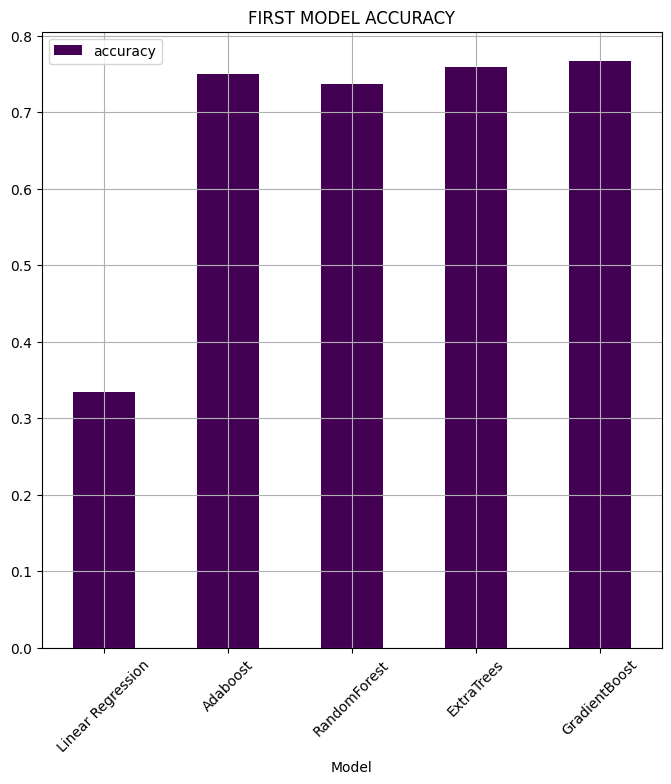

In [68]:
# Membuat plot batang dari DataFrame result_df dengan sumbu x adalah nama model dan sumbu y adalah skor akurasi. Plot ini memiliki ukuran 8x8 inci, grid, judul 'FIRST MODEL ACCURACY', dan menggunakan colormap 'viridis'. Label pada sumbu x diatur menjadi nama model dengan rotasi 45 derajat.
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis)
r1.set_xticklabels(result_df.Model, rotation=45)

- second models

In [69]:
# Membuat dictionary second_model yang berisi nama model dan skor akurasi masing-masing model setelah proses seleksi fitur pertama.
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

# Membuat DataFrame result_df dari dictionary second_model dan menampilkan isinya.
result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7366
1,RandomForest,0.7502
2,ExtraTrees,0.7421
3,GradientBoost,0.7494


[Text(0, 0, 'Adaboost'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'ExtraTrees'),
 Text(3, 0, 'GradientBoost')]

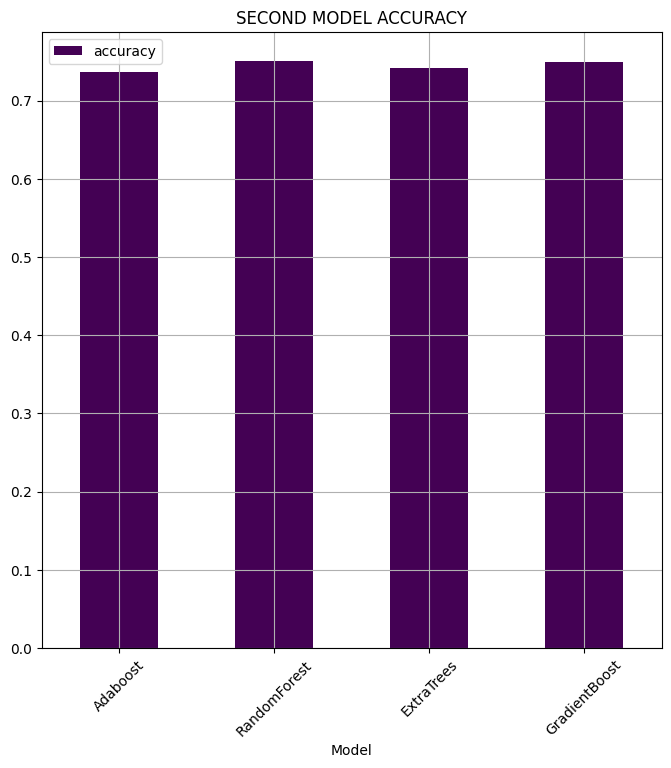

In [71]:
# Membuat plot batang dari DataFrame result_df dengan sumbu x adalah nama model dan sumbu y adalah skor akurasi. Plot ini memiliki ukuran 8x8 inci, grid, judul 'SECOND MODEL ACCURACY', dan menggunakan colormap 'viridis'. Label pada sumbu x diatur menjadi nama model dengan rotasi 45 derajat.
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis)
r2.set_xticklabels(result_df.Model, rotation=45)

- final models

In [80]:
# Membuat dictionary final_model yang berisi nama model dan skor akurasi masing-masing model setelah proses seleksi fitur terakhir.
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

# Membuat DataFrame result_df dari dictionary final_model dan menampilkan isinya.
result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.270334
1,Adaboost,0.737000
2,RandomForest,0.746000
3,ExtraTrees,0.776400
4,GradientBoost,0.754100
5,MLP,0.622600


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost'),
 Text(5, 0, 'MLP')]

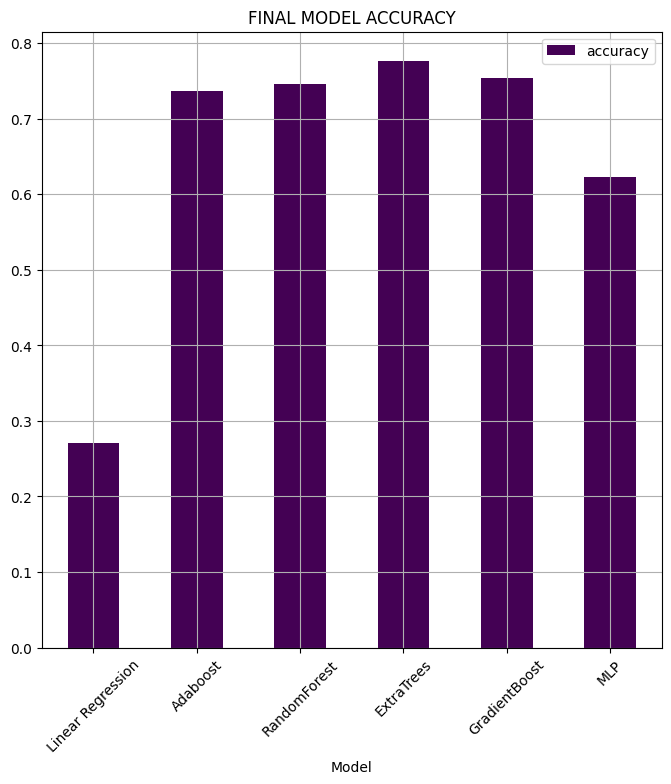

In [81]:
# Membuat plot batang dari DataFrame result_df dengan sumbu x adalah nama model dan sumbu y adalah skor akurasi. Plot ini memiliki ukuran 8x8 inci, grid, judul 'FINAL MODEL ACCURACY', dan menggunakan colormap 'viridis'. Label pada sumbu x diatur menjadi nama model dengan rotasi 45 derajat.
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis)
r3.set_xticklabels(result_df.Model, rotation=45)

## FASTEST AND ACCURATE MODEL - ExtraTrees of the final model (76.4%)
## STRONGEST AND THE MOST ACCURATE MODEL - GradientBoost of the final model (77.1%)

Gradient boost has a 77 percent chance, but the speed is significantly faster with ExtraTress.